In [2]:
from ipythonblocks import BlockGrid
from IPython.display import clear_output
from pylab import *

In [9]:
INFECTED = [255, 0, 0]
DEAD = [0, 0, 0]
SUCEPTIBLE = [192, 192, 192]
RECOVERED = [0, 255, 0]
GHOST = [255, 255, 255]
VACCINATED = [255, 255, 0]

def go(i, j, direction):
    if direction == 'up':
        return i + 1, j
    if direction == 'down':
        return i - 1, j
    if direction == 'left':
        return i, j - 1
    if direction == 'right':
        return i, j + 1
    
def get_color(block):
    return [block.red, block.green, block.blue]

def set_color(block, color):
    block.rgb = color
    
def initialize_grid(w, h, patient_zero=[5, 5], block_size=50):
    today = BlockGrid(w, h, block_size=block_size)
    for i in range(h):
        for j in range(w):
            block = today[i, j]
            if i == h - 1 or i == 0:
                set_color(block, GHOST)
            elif j == w - 1 or j == 0:
                set_color(block, GHOST)
            elif [i, j] == patient_zero:
                set_color(block, INFECTED)
            else:
                set_color(block, SUCEPTIBLE)
    return today

def vaccinate(grid, zeta=0.2):
    '''
    zeta: 0.2 means 20% of population gets vaccinated

    '''
    w, h = grid.shape
    for i in range(h):
        for j in range(w):
            my_color = get_color(grid[i, j])
            if my_color == SUCEPTIBLE:
                if random() < zeta:
                    set_color(grid[i, j], VACCINATED)
                    
def destiny(color, alpha=0.2, beta=0.2, mu=0.2):
    '''
    alpha: 0.2 means 20% probability of being infected
    beta: 0.2 means 20% probability of becoming immune
    mu = 0.2 means 20% probability of dying (80% probability of recovering)

    '''
    if color == SUCEPTIBLE:
        if random() < alpha:
            color = INFECTED
    if color == INFECTED:
        if random() < beta:
            if random() < mu:
                color = DEAD
            else:
                color = RECOVERED
    return color
    
def analyse(grid):
    n_dead = 0
    n_recovered = 0
    n_suceptible = 0
    n_infected = 0
    n_vaccinated = 0
    w, h = grid.shape
    for i in range(h):
        for j in range(w):
            my_color = get_color(grid[i, j])
            if my_color == SUCEPTIBLE:
                n_suceptible += 1
            if my_color == DEAD:
                n_dead += 1
            if my_color == RECOVERED:
                n_recovered += 1
            if my_color == INFECTED:
                n_infected += 1
            if my_color == VACCINATED:
                n_vaccinated += 1
    return n_dead, n_recovered, n_suceptible, n_infected, n_vaccinated

def simulate(grid, n_days, flash=True):
    today = grid.copy()
    w, h = grid.shape
    for day in range(n_days):
        tomorrow = today.copy()
        for i in range(h):
            for j in range(w):
                my_color = get_color(tomorrow[i, j])
                if my_color == SUCEPTIBLE:
                    for direction in ['up', 'down', 'left', 'right']:
                        i_neighbor, j_neighbor = go(i, j, direction)
                        neighbor_color = get_color(today[i_neighbor, j_neighbor])
                        if neighbor_color == INFECTED:
                            my_color = get_color(tomorrow[i, j])
                            my_destiny = destiny(my_color)
                            set_color(tomorrow[i, j], my_destiny)
        today = tomorrow
        if flash:
            today.flash()
    return today

In [34]:
w = 25
h = 25
N_dead, N_recovered, N_suceptible, N_infected, N_vaccinated = [], [], [], [], []
for n in range(100):
    today = initialize_grid(w, h, patient_zero=[10, 10], block_size=16)
    # today.show()
    vaccinate(today)
    # today.show()
    result = simulate(today, n_days=150, flash=False)
    n_dead, n_recovered, n_suceptible, n_infected, n_vaccinated = analyse(result)
    N_dead.append(n_dead / (w * h))
    N_recovered.append(n_recovered / (w * h))
    N_suceptible.append(n_suceptible / (w * h))
    N_infected.append(n_infected / (w * h))
    N_vaccinated.append(n_vaccinated / (w * h))

Text(0,0.5,'Occurences')

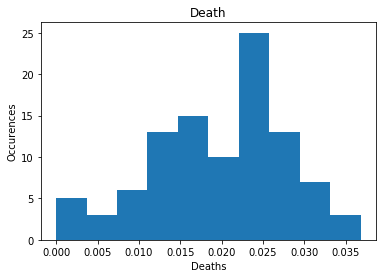

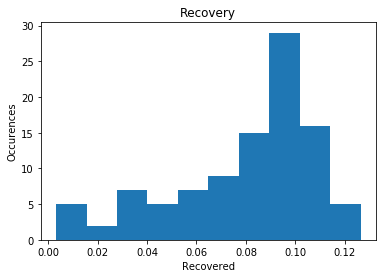

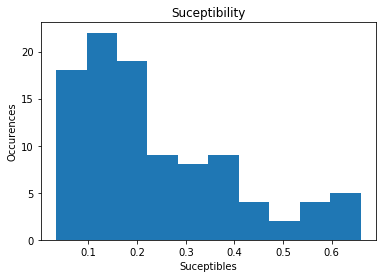

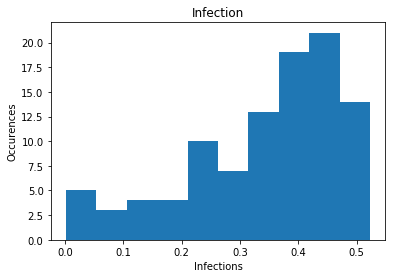

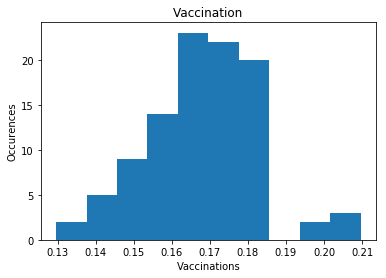

In [35]:
fig = plt.figure()
plt.hist(N_dead)
plt.title('Death')
plt.xlabel('Deaths')
plt.ylabel('Occurences')

fig = plt.figure()
plt.hist(N_recovered)
plt.title('Recovery')
plt.xlabel('Recovered')
plt.ylabel('Occurences')

fig = plt.figure()
plt.hist(N_suceptible)
plt.title('Suceptibility')
plt.xlabel('Suceptibles')
plt.ylabel('Occurences')

fig = plt.figure()
plt.hist(N_infected)
plt.title('Infection')
plt.xlabel('Infections')
plt.ylabel('Occurences')

fig = plt.figure()
plt.hist(N_vaccinated)
plt.title('Vaccination')
plt.xlabel('Vaccinations')
plt.ylabel('Occurences')